3. Implement Greedy search algorithm for any of the following application:

I. Selection Sort

II. Minimum Spanning Tree

III. Single-Source Shortest Path Problem

IV. Job Scheduling Problem

V. Prim's Minimal Spanning Tree Algorithm

VI. Kruskal's Minimal Spanning Tree Algorithm

VII. Dijkstra's Minimal Spanning Tree Algorithm

# Selection Sort

Sorting steps:


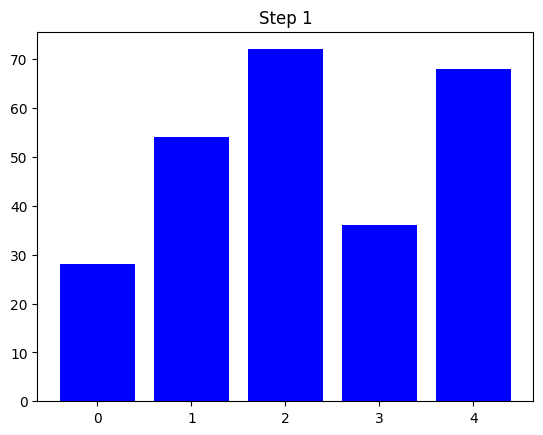

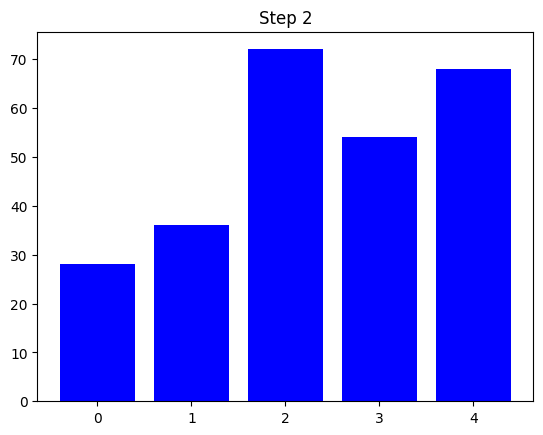

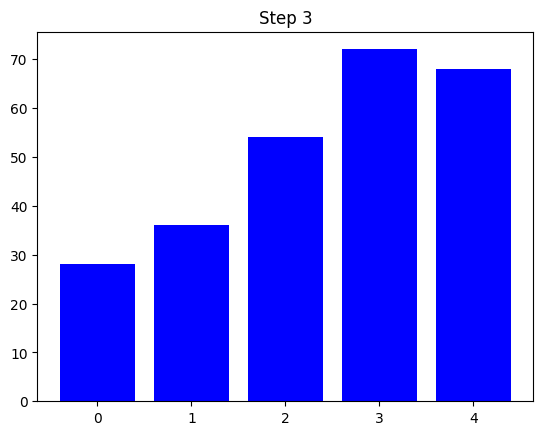

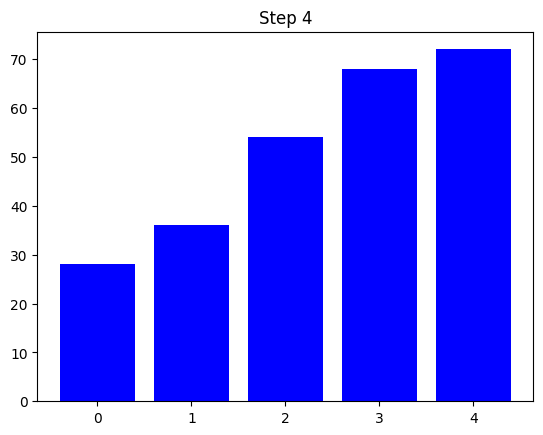

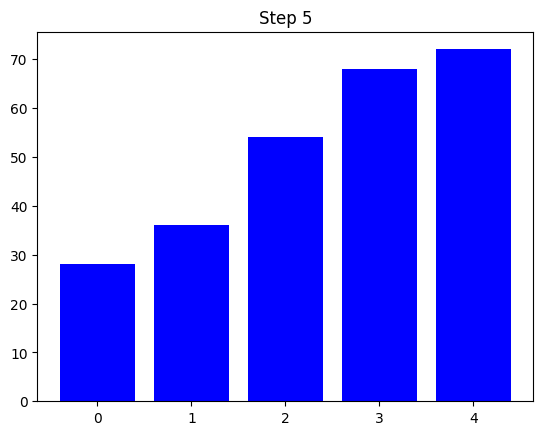

Sorted array: [28, 36, 54, 68, 72]


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import time

def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        min_index = i
        for j in range(i+1, n):
            if arr[j] < arr[min_index]:
                min_index = j
        arr[i], arr[min_index] = arr[min_index], arr[i]  # Swap
        visualize_sort(arr, i)  # Visualization after each step

def visualize_sort(arr, step):
    plt.clf()
    plt.bar(range(len(arr)), arr, color='blue')
    plt.title(f"Step {step + 1}")
    plt.pause(0.5)

# User Input
arr = list(map(int, input("Enter numbers separated by space: ").split()))
print("Sorting steps:")
plt.ion()
selection_sort(arr)
plt.ioff()
plt.show()
print("Sorted array:", arr)

# Minimum Spanning Tree (MST) - Prim’s Algorithm

Visualizing the cycle ... 


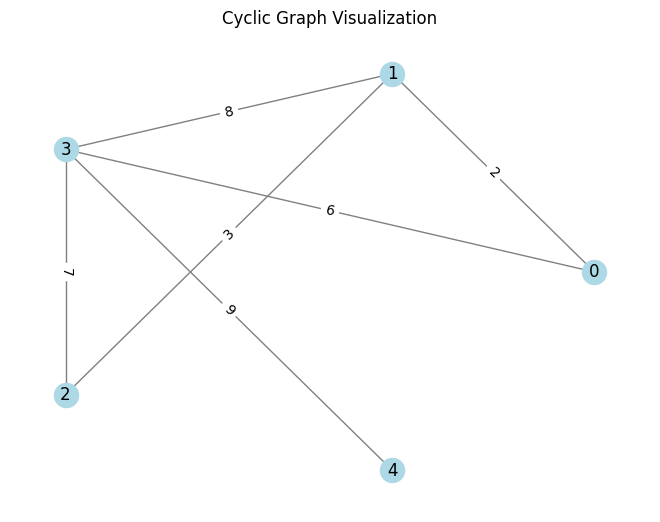

Running Prim's Algorithm...


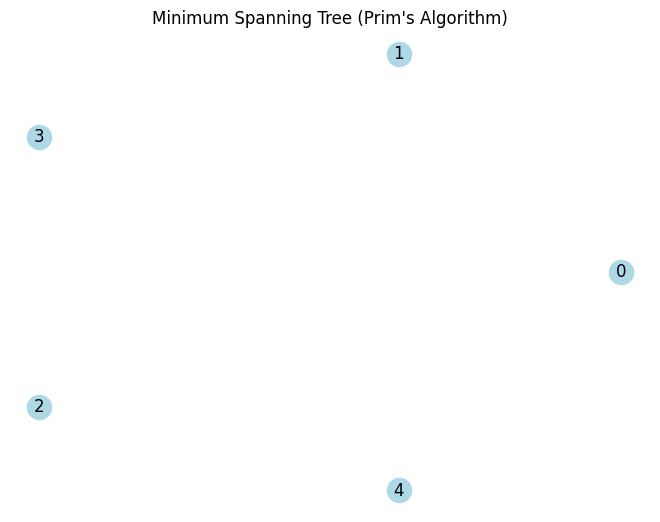

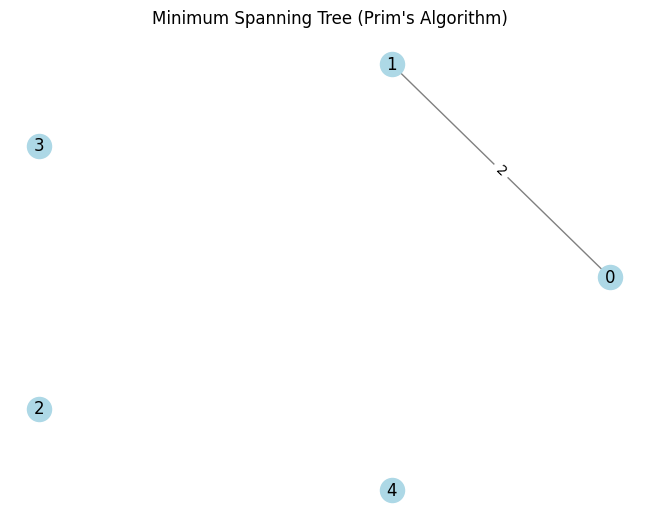

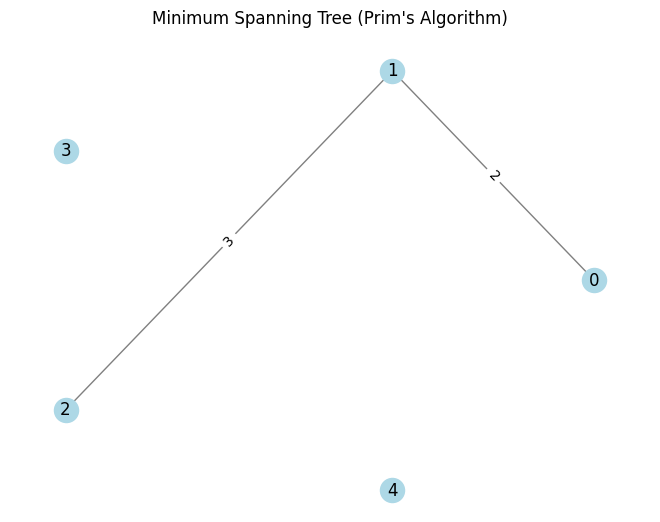

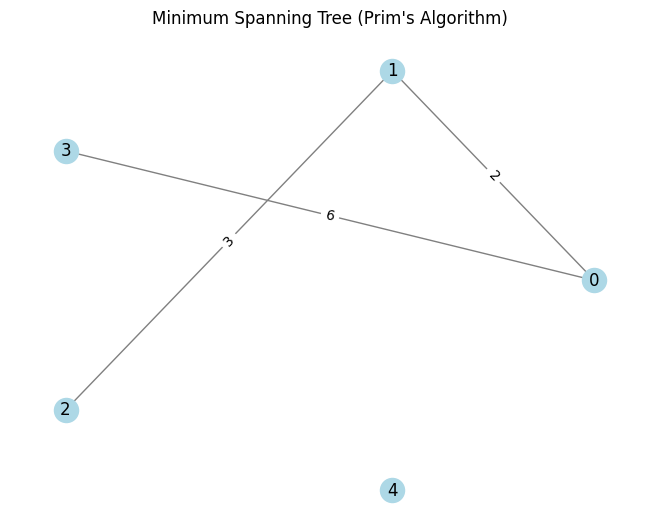

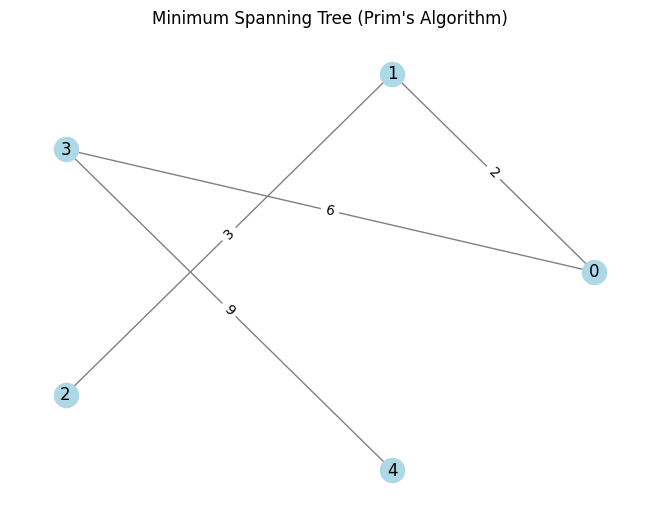

In [7]:
import networkx as nx 
import heapq 
import matplotlib.pyplot as plt

def visualize_graph(graph, edges, title="Graph Visualization"):
    G = nx.Graph() 
    for node in graph: 
        G.add_node(node) 
    for edge in edges: 
        u, v, w = edge 
        G.add_edge(u, v, weight=w) 
    pos = nx.circular_layout(G) # Arrange nodes in a circular Layout for cycle visual
    labels = nx.get_edge_attributes(G, 'weight')
    plt.clf() 
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray') 
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels) 
    plt.title(title) 
    plt.pause(1)

def prims_mst(graph, start_node):
    n = len(graph) 
    mst = [] 
    visited = set() 
    pq = [(0, start_node, None)] # (cost, node, parent)
    
    while len(mst) < n - 1: 
        cost, node, parent = heapq.heappop(pq)
        if node in visited: 
            continue 
        visited.add(node) 
        if parent is not None: 
            mst.append((parent, node, cost)) 
        visualize_graph(graph, mst, "Minimum Spanning Tree (Prim's Algorithm)") 
        for neighbor, weight in graph[node]: 
            if neighbor not in visited: 
                heapq.heappush(pq, (weight, neighbor, node))
    
    return mst

# User Input
n = int(input("Enter the number of nodes: "))
graph = {}
for _ in range(n): 
    node = int(input(f"Enter node {_ + 1}: ")) 
    graph[node] = [] 
    edges_count = int(input(f"Enter the number of edges for node {node}: ")) 
    for _ in range(edges_count): 
        neighbor, weight = map(int, input("Enter neighbor and weight (space-separated): ").split()) 
        graph[node].append((neighbor, weight)) 
        if neighbor not in graph: 
            graph[neighbor] = [] 
        graph[neighbor].append((node, weight))

start_node = int(input("Enter start node: "))

# Extracting edges for cycle visualization
edges = []
visited = set()
for node in graph: 
    for neighbor, weight in graph[node]: 
        if (neighbor, node, weight) not in edges: 
            edges.append((node, neighbor, weight))

plt.ion() 
print("Visualizing the cycle ... ") 
visualize_graph(graph, edges, "Cyclic Graph Visualization")
print("Running Prim's Algorithm...") 
prims_mst(graph, start_node) 
plt.ioff() 
plt.show()


Enter the number of nodes: 5
Enter node 1: 0
Enter the number of edges for node 0: 2
Enter neighbor and weight (space-separated): 1 2
Enter neighbor and weight (space-separated): 3 6
Enter node 2: 1
Enter the number of edges for node 1: 3
Enter neighbor and weight (space-separated): 0 2
Enter neighbor and weight (space-separated): 2 3
Enter neighbor and weight (space-separated): 3 8
Enter node 3: 2
Enter the number of edges for node 2: 2
Enter neighbor and weight (space-separated): 1 3
Enter neighbor and weight (space-separated): 3 7
Enter node 4: 3
Enter the number of edges for node 3: 4
Enter neighbor and weight (space-separated): 0 6
Enter neighbor and weight (space-separated): 1 8
Enter neighbor and weight (space-separated): 2 7
Enter neighbor and weight (space-separated): 4 9
Enter node 5: 4
Enter the number of edges for node 4: 1
Enter neighbor and weight (space-separated): 3 9
Enter start node: 0


# Single-Source Shortest Path - Dijkstra’s Algorithm

Running Dijkstra's Algorithm...


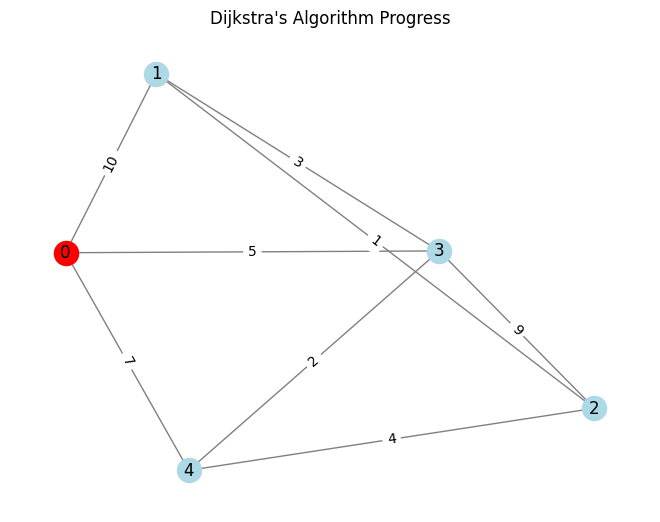

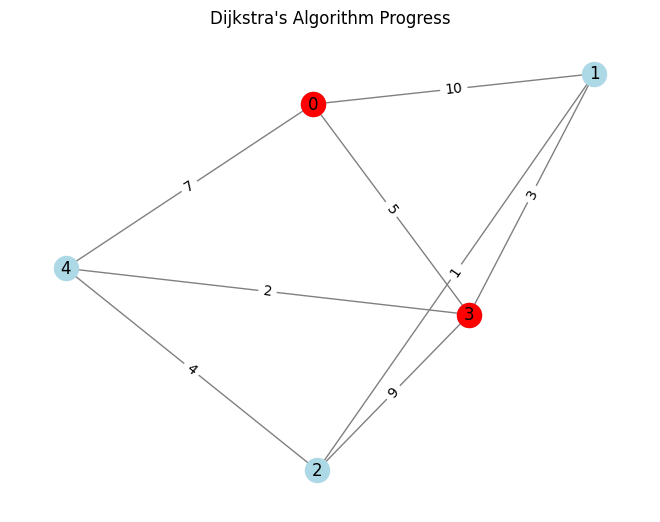

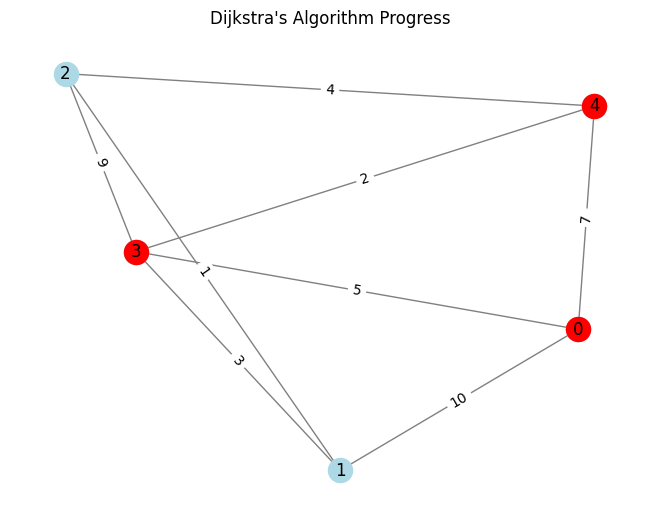

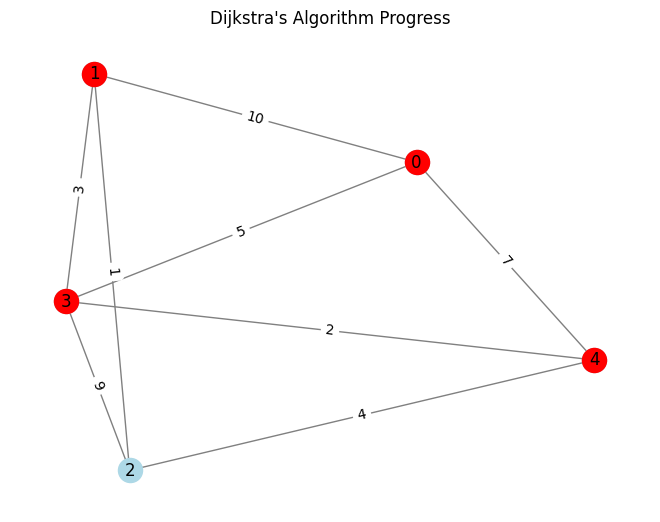

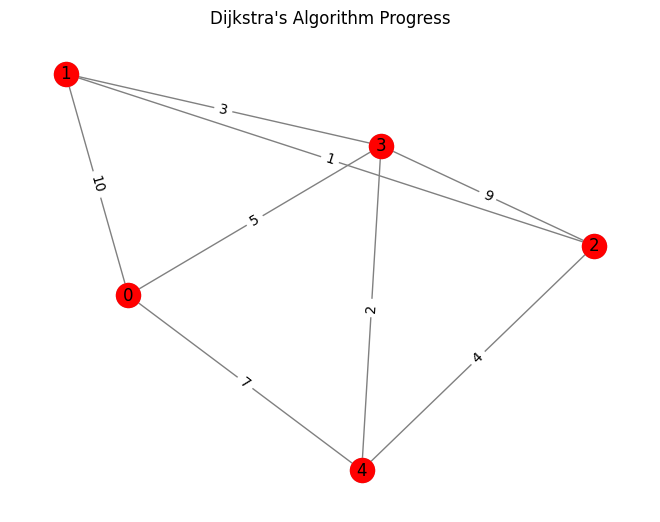

Shortest paths: {0: 0, 1: 8, 2: 9, 3: 5, 4: 7}


In [ ]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def visualize_dijkstra(graph, distances, visited):
    G = nx.Graph()
    for node in graph:
        G.add_node(node)
    for node, edges in graph.items():
        for neighbor, weight in edges:
            G.add_edge(node, neighbor, weight=weight)

    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')

    plt.clf()
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    # Highlight visited nodes
    nx.draw_networkx_nodes(G, pos, nodelist=visited, node_color='red')
    plt.title("Dijkstra's Algorithm Progress")
    plt.pause(1)

def dijkstra(graph, start):
    heap = [(0, start)]
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    visited = []

    while heap:
        cost, node = heapq.heappop(heap)
        if node in visited:
            continue
        visited.append(node)
        visualize_dijkstra(graph, distances, visited)  # Visualization

        for neighbor, weight in graph[node]:
            new_cost = cost + weight
            if new_cost < distances[neighbor]:
                distances[neighbor] = new_cost
                heapq.heappush(heap, (new_cost, neighbor))

    return distances

# Taking user input for graph construction
graph = {}
num_nodes = int(input("Enter the number of nodes: "))

for i in range(num_nodes):
    node = int(input(f"Enter node {i+1}: "))
    graph[node] = []
    num_edges = int(input(f"Enter the number of edges for node {node}: "))
    for _ in range(num_edges):
        neighbor, weight = map(int, input("Enter neighbor and weight (space-separated): ").split())
        graph[node].append((neighbor, weight))

start_node = int(input("Enter start node: "))

plt.ion()
print("Running Dijkstra's Algorithm...")
print("Shortest paths:", dijkstra(graph, start_node))
plt.ioff()
plt.show()

Enter the number of nodes: 5
Enter node 1: 0
Enter the number of edges for node 0: 2
Enter neighbor and weight (space-separated): 1 10
Enter neighbor and weight (space-separated): 3 5
Enter node 2: 1
Enter the number of edges for node 1: 2
Enter neighbor and weight (space-separated): 2 1
Enter neighbor and weight (space-separated): 3 2
Enter node 3: 2
Enter the number of edges for node 2: 1
Enter neighbor and weight (space-separated): 4 4
Enter node 4: 3
Enter the number of edges for node 3: 3
Enter neighbor and weight (space-separated): 1 3
Enter neighbor and weight (space-separated): 2 9
Enter neighbor and weight (space-separated): 4 2
Enter node 5: 4
Enter the number of edges for node 4: 1
Enter neighbor and weight (space-separated): 0 7
Enter start node: 0

# Job Scheduling Problem

In [10]:
def job_scheduling(jobs):
    jobs.sort(key=lambda x: x[1], reverse=True)
    result = []
    for job in jobs:
        result.append(job[0])
    return result

# User Input
n = int(input("Enter number of jobs: "))
jobs = []
for _ in range(n):
    name, profit = input("Enter job name and profit: ").split()
    jobs.append((name, int(profit)))

print("Scheduled Jobs:", job_scheduling(jobs))


Scheduled Jobs: ['J2', 'J4', 'J3', 'J1', 'J5']


Enter number of jobs: 5
Enter job name and profit: J1 20
Enter job name and profit: J2 100
Enter job name and profit: J3 50
Enter job name and profit: J4 70
Enter job name and profit: J5 10

# Kruskal’s Algorithm

Running Kruskal's Algorithm...


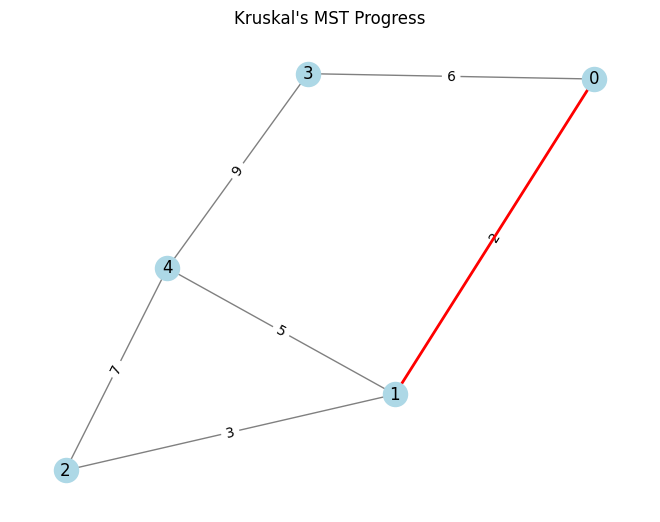

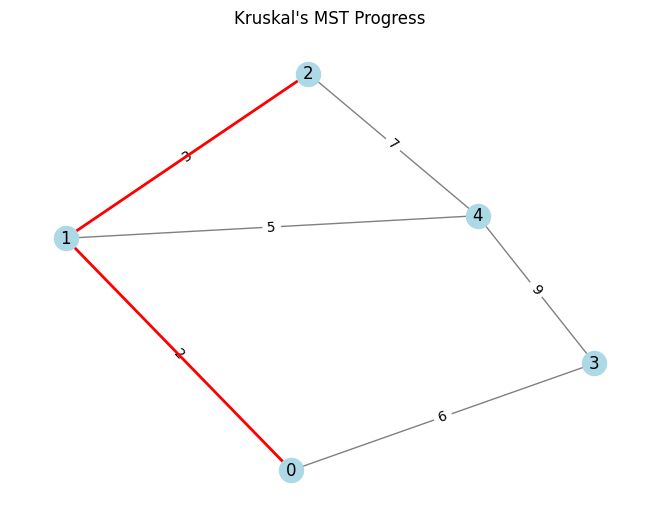

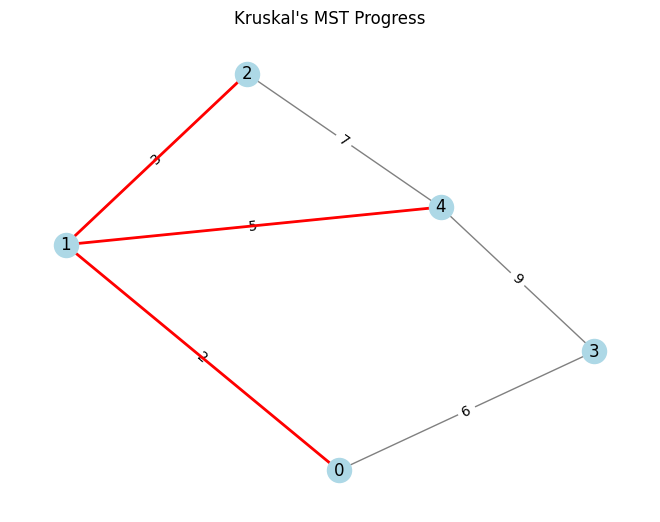

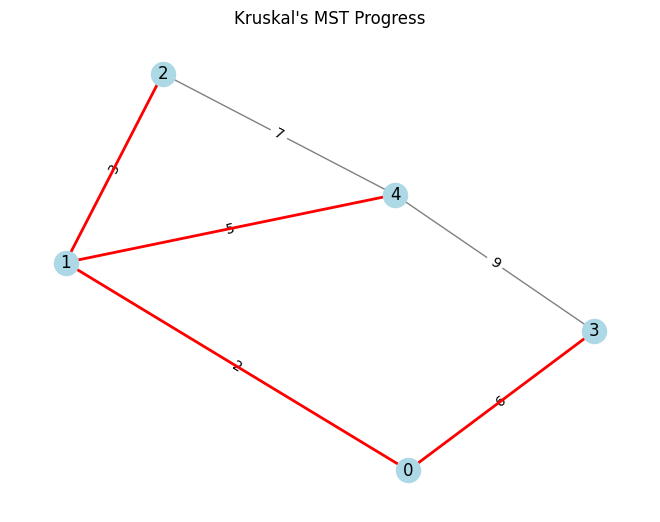

In [14]:
def visualize_kruskal(edges, mst):
    G = nx.Graph()
    for u, v, w in edges:
        G.add_edge(u, v, weight=w)

    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')

    plt.clf()
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    # Highlight MST edges
    mst_edges = [(u, v) for u, v, _ in mst]
    nx.draw_networkx_edges(G, pos, edgelist=mst_edges, edge_color='red', width=2)
    plt.title("Kruskal's MST Progress")
    plt.pause(1)

def kruskal(graph, n):
    edges = sorted(graph, key=lambda x: x[2])
    parent = {i: i for i in range(n)}
    
    def find(v):
        if parent[v] == v:
            return v
        parent[v] = find(parent[v])
        return parent[v]

    mst = []
    for u, v, weight in edges:
        pu, pv = find(u), find(v)
        if pu != pv:
            mst.append((u, v, weight))
            parent[pu] = pv
            visualize_kruskal(edges, mst)  # Visualization

    return mst

# User Input
edges = []
n = int(input("Enter number of nodes: "))
for _ in range(int(input("Enter number of edges: "))):
    u, v, w = map(int, input("Enter edge (u, v, weight): ").split())
    edges.append((u, v, w))

plt.ion()
print("Running Kruskal's Algorithm...")
kruskal(edges, n)
plt.ioff()
plt.show()


In [ ]:
Enter number of nodes: 5
Enter number of edges: 7
Enter edge (u, v, weight): 0 1 2
Enter edge (u, v, weight): 0 3 6
Enter edge (u, v, weight): 1 2 3
Enter edge (u, v, weight): 1 2 3
Enter edge (u, v, weight): 1 4 5
Enter edge (u, v, weight): 2 4 7
Enter edge (u, v, weight): 3 4 9
Running Kruskal's Algorithm...


Title: Implementation of Greedy Search Algorithm
Theory:
A Greedy Algorithm is a problem-solving paradigm that builds up a solution piece by piece, always choosing the next piece that offers the most immediate benefit. In each step, it picks the locally optimal solution with the hope that this approach will lead to a globally optimal solution.
The greedy method does not always guarantee the best solution for every problem, but for certain types of problems (like optimization problems), it produces optimal results. The method is efficient in terms of time complexity as it avoids exhaustive search and backtracking.
Greedy algorithms work best when:
•	The problem has the greedy-choice property (a global optimum can be arrived at by choosing a local optimum),
•	The problem exhibits optimal substructure (an optimal solution to the problem contains optimal solutions to subproblems).
I. Selection Sort (Greedy-Based Sorting Algorithm)
Algorithm:
1.	Repeat for each index i from 0 to n-1:
o	Find the index min_idx of the smallest element in the subarray from i to n-1.
o	Swap the element at index i with the element at min_idx.
2.	End.
Greedy Approach: At every step, select the smallest element (locally optimal) and place it in its correct position.
________________________________________
II. Minimum Spanning Tree (Generic)
Algorithm (Conceptual Steps):
1.	Initialize MST as an empty set.
2.	While MST has fewer than (V - 1) edges:
o	Select the minimum-weight edge that does not form a cycle in the MST.
o	Add it to the MST.
3.	End.
Greedy Approach: Choose the smallest possible edge at each step to build the spanning tree.
________________________________________
III. Single-Source Shortest Path (Generic)
Algorithm (Conceptual Steps using Dijkstra's approach):
1.	Set the distance of the source node to 0 and others to ∞.
2.	Initialize a priority queue with the source node.
3.	While the queue is not empty:
o	Remove the node with the smallest distance.
o	For each neighbor, update distance if a shorter path is found.
4.	End.
Greedy Approach: Always pick the node with the smallest tentative distance.
________________________________________
IV. Job Scheduling Problem (Without Deadlines)
Algorithm:
1.	Sort all jobs in decreasing order of profit.
2.	For each job in the sorted list:
o	Add the job to the result list.
3.	Return the result list.
Greedy Approach: Always pick the job that offers the highest profit at that moment.
________________________________________
V. Prim’s Minimal Spanning Tree Algorithm
Algorithm:
1.	Initialize all node distances as ∞ except the start node (set to 0).
2.	Maintain a priority queue of nodes based on edge weights.
3.	While the queue is not empty:
o	Extract the node with the smallest weight edge.
o	Add it to the MST.
o	Update neighbors’ distances if the connecting edge weight is smaller.
4.	End.
Greedy Approach: Always select the minimum-weight edge to expand the MST.
________________________________________
VI. Kruskal’s Minimal Spanning Tree Algorithm
Algorithm:
1.	Sort all edges in non-decreasing order of weight.
2.	Initialize a disjoint set for all nodes.
3.	For each edge in sorted list:
o	If adding the edge doesn’t create a cycle, add it to MST.
4.	Stop when MST contains (V - 1) edges.
Greedy Approach: Pick the smallest edge that doesn’t form a cycle.
________________________________________
VII. Dijkstra’s Algorithm (Shortest Path)
Algorithm:
1.	Initialize distances to ∞ for all nodes; set distance of source node to 0.
2.	Use a min-heap (priority queue) to process nodes by shortest known distance.
3.	For each visited node:
o	For each neighbor, update distance if current path is shorter.
4.	Repeat until all nodes are processed.